## Uber Ride Fare Prediction using Regression Analysis.

### Task 1: Load and Explore the Dataset

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Ritikyadav\OneDrive\Documents\Desktop\MentorMind_upGrad\Dataset_Predict The Fare Amount Of Future Rides Using Regression Analysis\uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [54]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [55]:
df.shape

(200000, 8)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [57]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


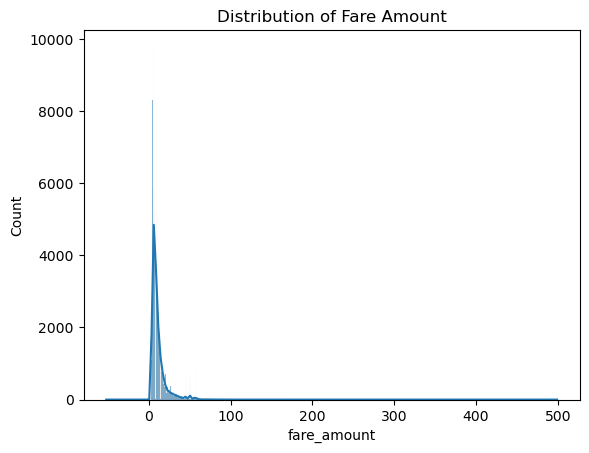

In [58]:
# check target variable
sns.histplot(df["fare_amount"],kde = True)
plt.title("Distribution of Fare Amount")
plt.show()

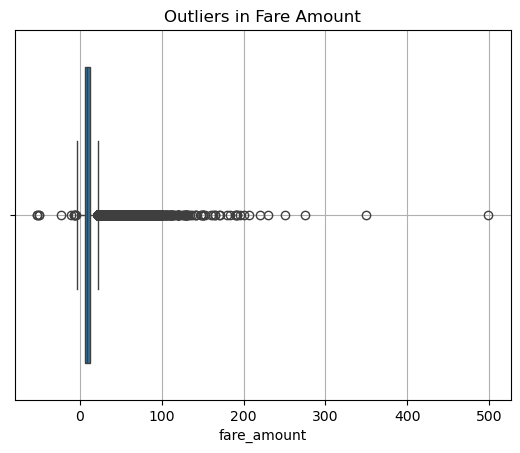

In [59]:
# Boxplot to check outliers
sns.boxplot(x=df["fare_amount"])
plt.title("Outliers in Fare Amount")
plt.grid()
plt.show()

### Handle Missing Data


In [60]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [61]:
df = df.dropna()

In [62]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Feature Engineering


In [63]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["hour"] = df["pickup_datetime"].dt.hour
df["day"] = df["pickup_datetime"].dt.day
df["dat_of_week"] = df["pickup_datetime"].dt.dayofweek
df["month"] = df["pickup_datetime"].dt.month

In [64]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'dat_of_week', 'month'],
      dtype='object')

In [65]:
df = df.rename(columns = {"dat_of_week":"day_of_week"})

In [66]:
# Define the calucate the distance using haversine formula
from math import radians, sin,cos,sqrt,atan2
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'day_of_week', 'month'],
      dtype='object')

In [67]:
def haversine(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) **2
    return 2 * R * atan2(sqrt(a),sqrt(1-a))
    
df["distance_km"] = df.apply(lambda row: haversine(row["pickup_latitude"],
                                                  row["pickup_longitude"],
                                                  row["dropoff_latitude"],
                                                  row["dropoff_longitude"]),axis = 1 )
    

In [68]:
# Categorize Distance
df["distance_category"] = pd.cut(df["distance_km"],bins=[0,2,6,20],labels = ["short","medium","long"])

### Split the Dataset

In [69]:
from sklearn.model_selection import train_test_split


In [70]:
# Select features(X) and target (y)
X = df[["distance_km","hour","day_of_week","month","passenger_count"]]
y = df["fare_amount"]

# Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X_train.shape,X_test.shape)

(159999, 5) (40000, 5)


### Data Scaling / Normalization

In [71]:
from sklearn.preprocessing import StandardScaler


In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Correlation Analysis

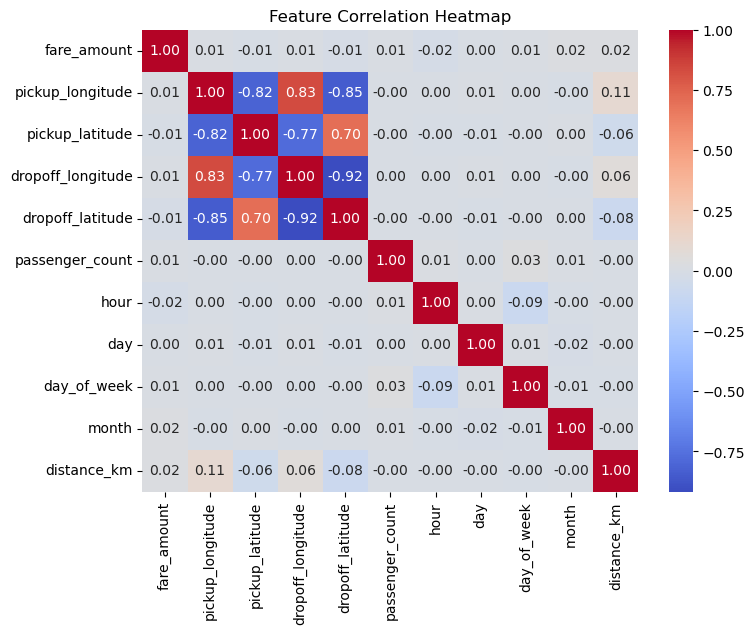

In [73]:
numeric_df = df.select_dtypes(include = ["number"])

corr_matrix = numeric_df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix,annot = True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
